In [23]:
import numpy as np
import pandas as pd
import math 
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.signal import welch, hanning, periodogram, get_window
# Genererer sinussignal med 1000 m/s^2 akselerasjonsamplitude, tilsvarende 1000 mm/s og 1000 um ved 159.15 Hz
f=1000/(2*math.pi)
Fs = 1000
N=100000

t = np.arange(0,(N)/Fs,1/Fs)
#t=t.reshape(len(t),1) dapeng
#x = 1000*(np.cos(2*math.pi*f*t)+ 0.01*np.random.rand(np.size(t))) 
x = 1000*(np.cos(2*math.pi*f*t)+ np.cos(2*math.pi*2*f*t)+ np.cos(2*math.pi*f/2*t)+0.01*np.random.rand(np.size(t))); #v=x/1000; d=v/1000;


In [28]:
plt.rcParams['figure.figsize'] = [20, 7]
fnum=1
plt.figure(fnum) 
fnum=fnum+1

plt.plot(t,x)
%matplotlib inline

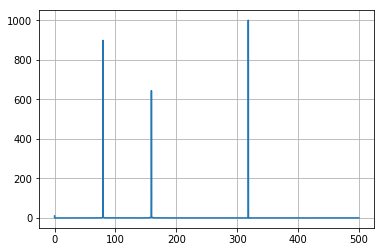

In [29]:
# Genererer fft amplitudespektrum
xdft = fft(x)
xdft = xdft[0:int(N/2)]
freq1 = np.arange(0,Fs/2,Fs/len(x)) #0:Fs/length(x):Fs/2


plt.figure(fnum); fnum=fnum+1;
#Amplitude spectrum is twice single side fft -> stemmer ikke...
plt.plot(freq1,2*abs(xdft)/N);
plt.grid(True)

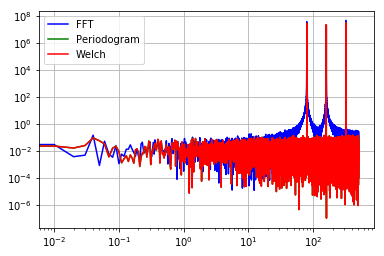

In [30]:
# Generate different psds with equal result
psdx = (1/(Fs*N)) * abs(xdft)**2;
psdx[1:-2] = 2*psdx[1:-2]; #psd from dft
win=get_window('hann', N)
freq2, psdpgram = periodogram(x, Fs, window=win)
freq3, psdwelch = welch(x, Fs, window=win,  nperseg= N, noverlap=N*2/3)

plt.figure(fnum); fnum=fnum+1;
plt.loglog(freq1,psdx, color='blue', label='FFT')
#hold on
plt.loglog(freq2,psdpgram, color='green', label='Periodogram')
plt.loglog(freq3,psdwelch, color='red', label='Welch')
plt.legend()
plt.grid(True)
plt.show()


/home/dp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/dp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


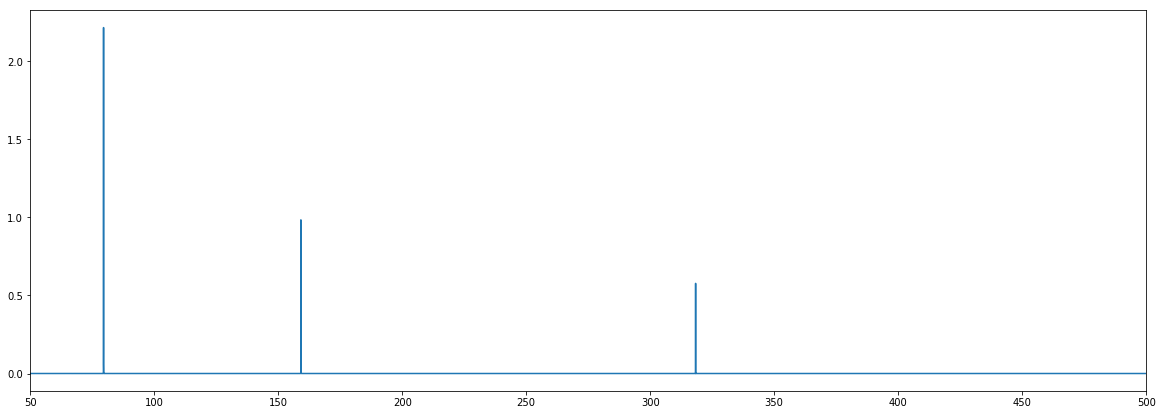

In [22]:
# Convert from acceleration psd from pwelch to displacement through omega arithmetic in the psd domain
psdv=psdwelch/(2*math.pi*freq3)**2; #dividing by w^2 per integration step in psd domain compared to w in the frequency domain
vdft=2*np.sqrt(psdv*Fs*N)/N; #Converting to from displacement psd to velocity amplitude spectrum
plt.figure(fnum); fnum=fnum+1;
plt.plot(freq3,vdft); 
plt.xlim((50, freq3[-1])); #Low frequency noise is amplified, amplitude slightly offset when N is small

/home/dp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/dp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


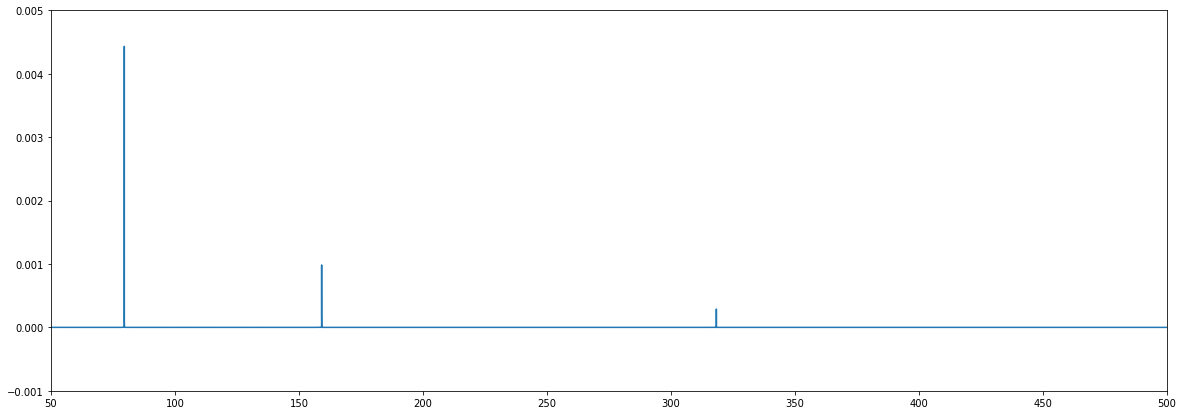

In [20]:
psdd=psdwelch/(2*math.pi*freq3)**4; #dividing by w^2 per integration step in psd domain compared to w in the frequency domain
ddft=2*np.sqrt(psdd*Fs*N)/N; #Converting to from displacement psd to displacement amplitude spectrum
plt.figure(fnum); fnum=fnum+1;
plt.plot(freq3,ddft); 
plt.xlim((50, freq3[-1])); #Low frequency noise is amplified, amplitude slightly offset when N is small
plt.ylim((-1e-3, 5e-3));